In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Lendo CSV
df = pd.read_csv('data/raw/delhivery.csv')

# Tipos de Dados
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()

In [2]:
# Excluindo linhas vazias
df = df.dropna()

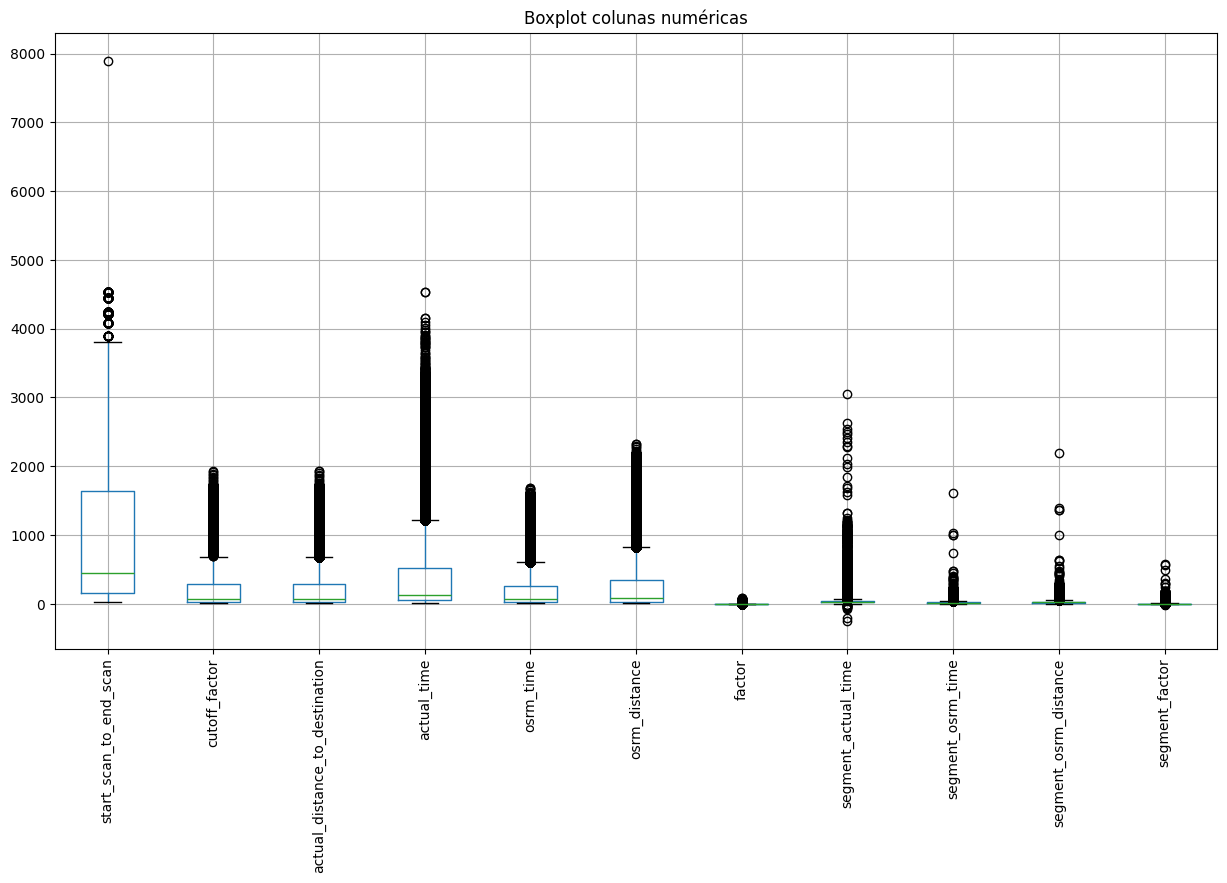

segment_factor                    47.336172
segment_osrm_distance             26.643163
segment_osrm_time                 19.705727
factor                            17.498068
segment_actual_time               16.820429
actual_time                        2.062382
osrm_distance                      2.042302
osrm_time                          2.039250
cutoff_factor                      1.986206
actual_distance_to_destination     1.985217
start_scan_to_end_scan             1.105346
dtype: float64


In [3]:
# Detecção de outliers
plt.figure(figsize=(15, 8))
df[numeric_columns].boxplot()
plt.title('Boxplot colunas numéricas')
plt.xticks(rotation=90)
plt.show()
skewness = df[numeric_columns].skew().sort_values(ascending=False)
print(skewness)

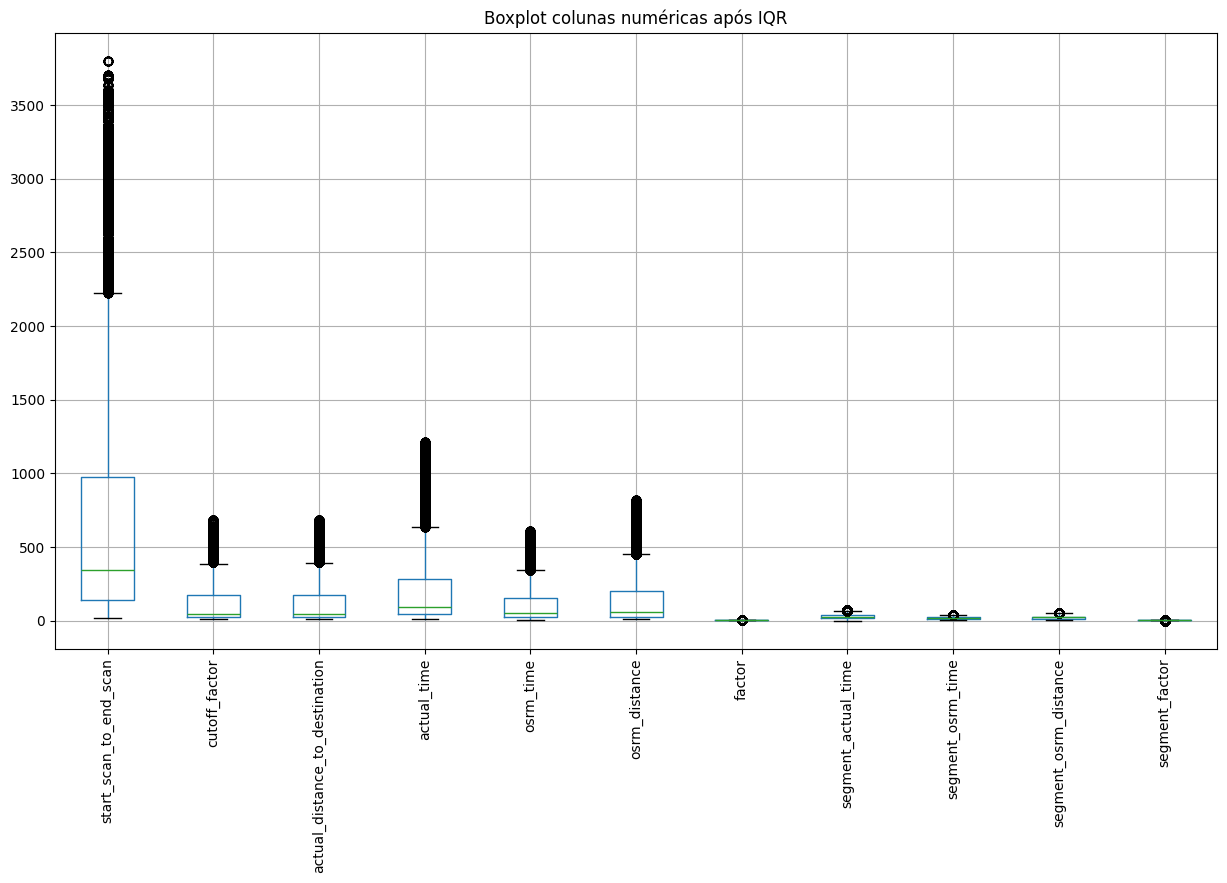

actual_time                       1.732584
osrm_distance                     1.725511
cutoff_factor                     1.717727
actual_distance_to_destination    1.716294
osrm_time                         1.704485
start_scan_to_end_scan            1.560492
segment_factor                    0.576460
segment_actual_time               0.525484
factor                            0.443585
segment_osrm_time                 0.275308
segment_osrm_distance             0.070506
dtype: float64


In [4]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores dentro do intervalo aceitável
df_filtered = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_filtered.to_csv("data/cleaned/delhivery_IQR.csv", index=False)
# Detecção de outliers
plt.figure(figsize=(15, 8))
df_filtered[numeric_columns].boxplot()
plt.title('Boxplot colunas numéricas após IQR')
plt.xticks(rotation=90)
plt.show()
skewness_clean = df_filtered[numeric_columns].skew().sort_values(ascending=False)
print(skewness_clean)

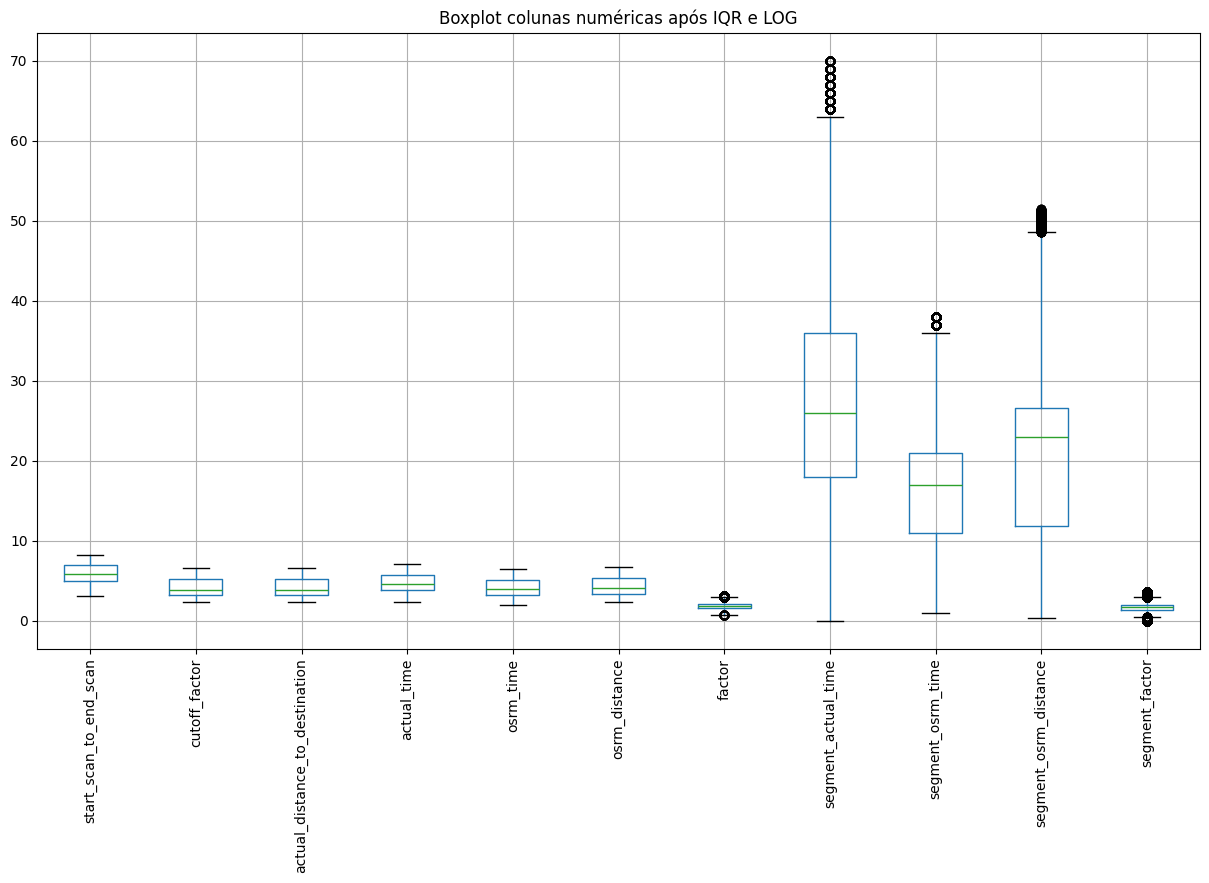

segment_factor                    0.576460
segment_actual_time               0.525484
factor                            0.443585
actual_distance_to_destination    0.332608
osrm_distance                     0.329040
osrm_time                         0.318657
cutoff_factor                     0.314417
actual_time                       0.281713
segment_osrm_time                 0.275308
start_scan_to_end_scan            0.161269
segment_osrm_distance             0.070506
dtype: float64


In [5]:
# Aplicar transformação logarítmica nas colunas com skewness moderada
columns_to_log_transform = ['start_scan_to_end_scan','cutoff_factor', 'actual_time', 'actual_distance_to_destination', 'osrm_time', 'osrm_distance']

# Aplicar log1p para evitar problemas com zeros
df_log_transformed = df_filtered.copy()
for col in columns_to_log_transform:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

df_log_transformed.to_csv("data/cleaned/delhivery_IQR_LOG.csv", index=False)
# Calcular skewness novamente após a transformação logarítmica
skewness_values_after_log = df_log_transformed[numeric_columns].skew().sort_values(ascending=False)

# Detecção de outliers
plt.figure(figsize=(15, 8))
df_log_transformed[numeric_columns].boxplot()
plt.title('Boxplot colunas numéricas após IQR e LOG')
plt.xticks(rotation=90)
plt.show()

# Exibir os novos valores de skewness
print(skewness_values_after_log)
